In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
#infile = open("calo_data_output.csv", "r")
#readin = csv.reader(infile)

In [3]:
caloData = pandas.read_csv("calo_data_output.csv")

In [4]:
caloData.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
1,1,15937275,15937,27,7,574.0
2,1,15937277,15937,27,9,571.0
3,1,15937279,15937,27,11,547.0
4,1,159372711,15937,27,14,471.0


In [5]:
caloData.loc[caloData['Global Bin'] == 15937273].head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
20677,2,15937273,15937,27,5,508.0
41354,3,15937273,15937,27,5,642.0
62031,4,15937273,15937,27,5,624.0
82708,5,15937273,15937,27,5,655.0


In [6]:
caloData1 = caloData.loc[caloData['Calorimeter Number'] == 1]
caloData1.tail()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
20672,1,15928463145,15928,463,147,580.0
20673,1,15928463147,15928,463,149,518.0
20674,1,15928463149,15928,463,151,585.0
20675,1,15928463151,15928,463,154,439.0
20676,1,15928463154,15928,463,154,476.0


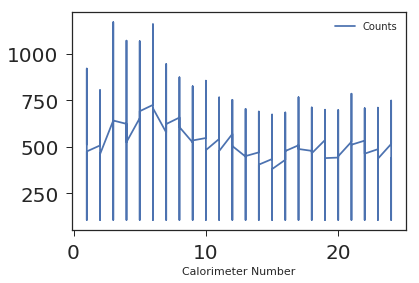

In [7]:
caloData.plot(y='Counts',x='Calorimeter Number')

In [8]:
data = []
for i in range(1,25):
    caloDatai = caloData.loc[caloData['Calorimeter Number'] == i]
    data.append(caloDatai['Counts'])

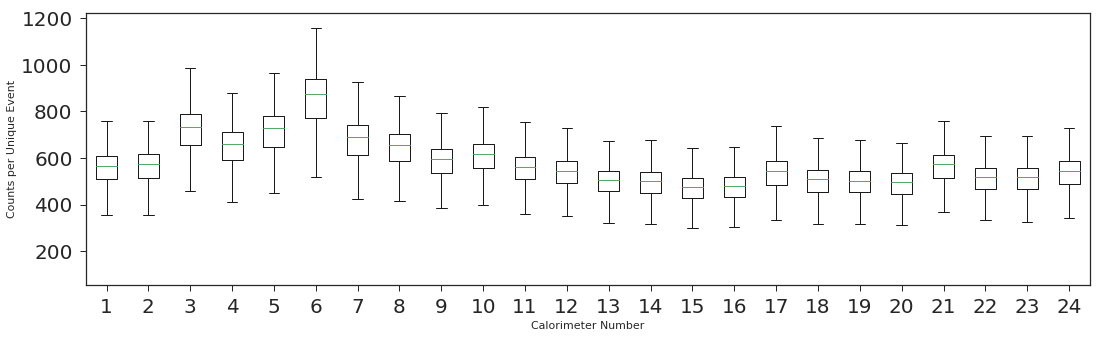

In [9]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(data)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.show()

Ok, this doesn't show the pattern that Kim was talking about earlier. Lets try to get the energy version and see from there

In [10]:
#caloDataEnergy = pandas.read_csv("./calo_data_output_energy.csv")
#caloDataEnergy.head()

In [11]:
'''dataEnergy = []
for i in range(1,25):
    caloDatai = caloDataEnergy.loc[caloDataEnergy['Calorimeter Number'] == i]
    dataEnergy.append(caloDatai['Counts'])
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergy)
plt.xlabel('Calorimeter Number')
plt.ylabel('Energy Dep. per Unique Event')
plt.show()'''

"dataEnergy = []\nfor i in range(1,25):\n    caloDatai = caloDataEnergy.loc[caloDataEnergy['Calorimeter Number'] == i]\n    dataEnergy.append(caloDatai['Counts'])\nfig, ax = plt.subplots(figsize=(18, 5))\nax.boxplot(dataEnergy)\nplt.xlabel('Calorimeter Number')\nplt.ylabel('Energy Dep. per Unique Event')\nplt.show()"

This doesn't show the pattern either. Calo 2 is perfectly well behaved according to these two metrics. 

Now lets implement an energy cut (1000 < E < 3000 MeV) and see if that changes anything

In [12]:
caloDataEnergyCut = pandas.read_csv("calo_data_output_cutEnergy.csv")
caloDataEnergyCut.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,1593700270003,15937,27,3,22
1,1,1593700270005,15937,27,5,35
2,1,1593700270007,15937,27,7,29
3,1,1593700270009,15937,27,9,32
4,1,1593700270011,15937,27,11,19


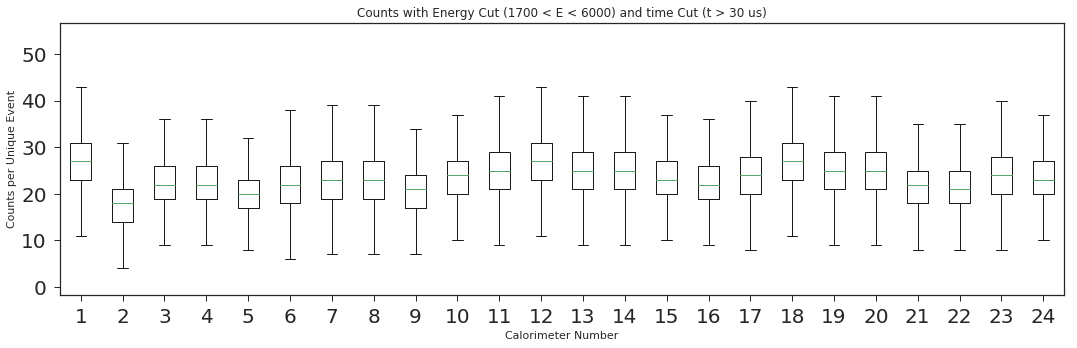

In [13]:
dataEnergyCut = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    dataEnergyCut.append(caloDatai['Counts'])
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergyCut)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.title('Counts with Energy Cut (1700 < E < 6000) and time Cut (t > 30 us)')
plt.show()

Nope! If anything, it just makes everything clump closer together... Hmmmm

In [52]:
caloDataXInt = pandas.read_csv("calo_data_output_xIntercept.csv")
caloDataXInt.head()

,Par0,Par0Err,Par1,Par1Err,CaloNum
0,-0.000190,2.679656e-07,2883.521876,0.781788,1
1,-0.000285,4.841013e-07,2737.854376,1.078235,2
2,-0.000283,4.020057e-07,2764.254702,0.808987,3
3,-0.000265,3.648094e-07,2767.763074,0.725848,4
4,-0.000292,5.378540e-07,2811.783915,1.473247,5


In [73]:
caloDataEnergyCut.describe()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
count,454904.000000,4.549040e+05,454904.000000,454904.00000,454904.000000,454904.000000
mean,12.499967,1.595299e+12,15952.970732,233.66585,80.469912,23.465758
std,6.922208,2.114230e+09,21.142742,143.84307,45.929507,6.148693
min,1.000000,1.592101e+12,15921.000000,0.00000,1.000000,1.000000
25%,6.000000,1.593500e+12,15935.000000,100.00000,41.000000,19.000000
50%,12.000000,1.594901e+12,15949.000000,230.00000,80.000000,23.000000
75%,19.000000,1.597303e+12,15973.000000,360.00000,119.000000,27.000000
max,24.000000,1.598905e+12,15989.000000,496.00000,284.000000,54.000000


[(26.974306215046955, 2883.521875536584, '1', 6.311504685147005, 0.7817879331583022), (17.78363406141184, 2737.854376048288, '2', 4.804529705081141, 1.0782347700086456), (22.55761316872428, 2764.254702443797, '3', 5.589350333049099, 0.8089871900738375), (22.585610296444774, 2767.763073739194, '4', 5.597932131304724, 0.7258480761573709), (20.08715838345468, 2811.7839148427843, '5', 5.194156837596443, 1.4732473139357645), (22.20507544581619, 2765.4339767532015, '6', 5.525810238017972, 0.9287762049100976), (23.394586894586894, 2802.3563967754394, '7', 5.6800586019228785, 0.9194005500978016), (22.80431571172312, 2755.4527784231464, '8', 5.596895253476203, 0.6850420011128283), (20.823687681350567, 2740.5091002623817, '9', 5.3154712571521445, 0.7799988614429975), (23.633797615279097, 2803.132649101061, '10', 5.749300867746941, 0.9104437119370664), (25.448559670781894, 2849.8828324797432, '11', 6.031470719282435, 0.8082504820806571), (27.166191832858498, 2921.109205437848, '12', 6.31469730751

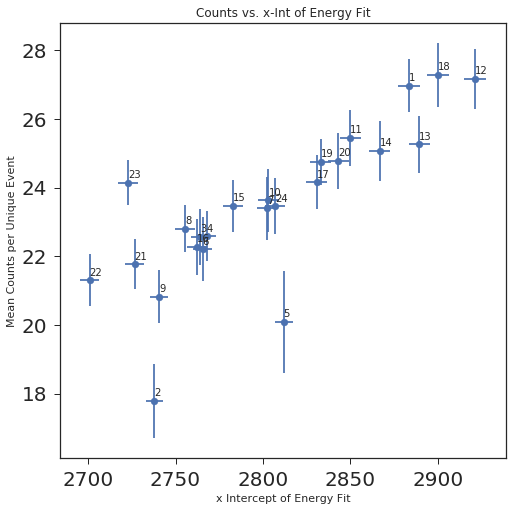

In [51]:
dataEnergyScatter = []
label = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataXInt.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Par1'].mean(),str(i),caloDatai['Counts'].std(),intDatai['Par1Err'].mean()))
    label.append(str(i))
    
print(dataEnergyScatter)

fig, ax = plt.subplots(figsize=(8, 8))
y,x,z,yerr,xerr = zip(*dataEnergyScatter)
plt.scatter(x, y)
plt.xlabel('x Intercept of Energy Fit')
plt.ylabel('Mean Counts per Unique Event')
plt.title('Counts vs. x-Int of Energy Fit')
plt.errorbar(x, y, xerr, yerr, ls='none')
for j,i,label,yerr,xerr in dataEnergyScatter:
    print(i,j)
    ax.annotate(label, xy=(i,j), xytext=(0,5), textcoords='offset points')
plt.show()

-3.0245002253428237 2549.9999962747097 27.220500225342825 3050.0000037252903
0.038461538461538464
-1.9230769230769231 51.92307692307692


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


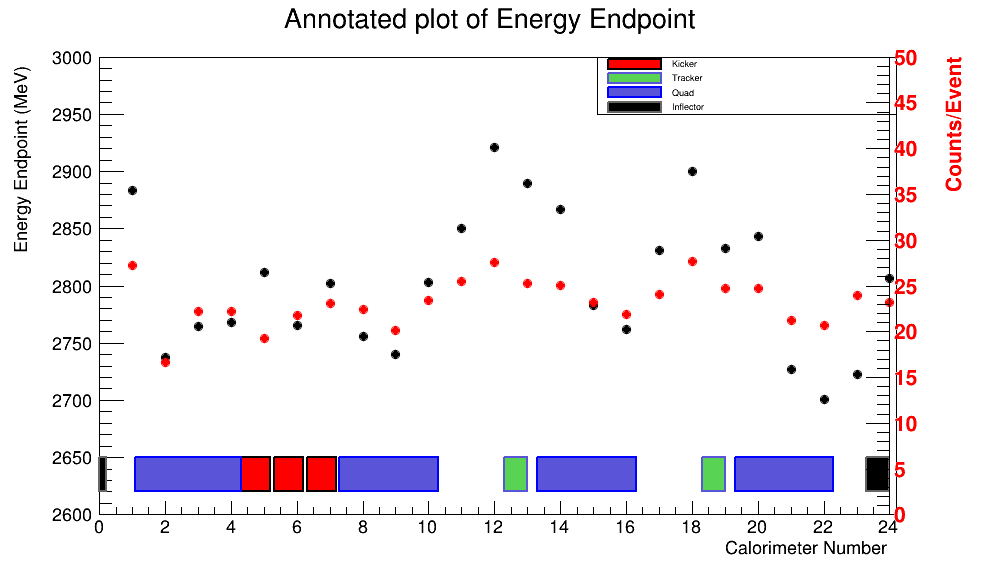

In [79]:
c = r.TCanvas("c","c",1000,600)
counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter)

pad1 = r.TPad("pad1","",0,0,1,1)
pad2 = r.TPad("pad2","",0,0,1,1)
pad2.SetFillStyle(4000) #will be transparent
pad1.Draw()
pad1.cd()

graph = r.TGraphErrors()
for i in range(len(counts)):
    graph.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph.SetPointError(i,0,energyErr[i])
    
graph.SetMarkerSize(1)
graph.SetMarkerStyle(20)
graph.Draw("a p0 e0")
graph.GetYaxis().SetRangeUser(2600,3000)
graph.GetXaxis().SetRangeUser(0,24)

graph.GetYaxis().SetTitle("Energy Endpoint (MeV)")
graph.GetXaxis().SetTitle("Calorimeter Number")
graph.SetTitle("Annotated plot of Energy Endpoint")

minpos = 2620
maxpos = 2650
maxpos2 = 2650

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.8,.9,.9)
#leg.AddEntry(graph,"Energy Endpoint","pl")
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
#leg.AddEntry(col1,"Collimator","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")
pad1.Update()


x1 = r.Double(0.0)
y1 = r.Double(0.0)
x2 = r.Double(0.0)
y2 = r.Double(0.0)
pad1.GetRange(x1,y1,x2,y2)
print(x1,y1,x2,y2)

padding = 100/2600
print(padding)

pad2.Range(x1,0-padding*50,x2,50+padding*50)
print(0-padding*50, 50+padding*50)

pad2.Draw()
pad2.cd()
graph2 = r.TGraphErrors()
for i in range(len(counts)):
    graph2.SetPoint(i,r.Double(label[i]),r.Double(counts[i]))
    graph2.SetPointError(i,0,0)

graph2.SetMarkerSize(1)
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(2)
graph2.SetLineColor(2)
graph2.GetYaxis().SetRangeUser(0,50)
graph2.GetXaxis().SetRangeUser(0,24)
graph2.Draw("p")
pad2.Update()

pad1.cd()

low = 0
high = 50
axis = r.TGaxis(24,2600,24,3000,low,high,510,"+L");
axis.SetLabelColor(2)
axis.SetTitleColor(2)
axis.SetTitle("Counts/Event")
axis.Draw()


c.Draw()